In [1]:
%matplotlib inline
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
train_data = '../../data/Ising/train/'
test_data = '../../data/Ising/test/'
valid_data = '../../data/Ising/valid/'

In [3]:
highTList=os.listdir(train_data+"high")

In [4]:
class_names = ['low', 'high']

In [5]:
def one_hot_label(img):
    label,T,_,_ = img.split('_')
    if label == 'low':
        ohl = np.array([1,0])
    elif label == 'high':
        ohl = np.array([0,1])
    return ohl,T
def train_data_with_label(train_path,*args):
    train_images = []
    if args:
        for category in args:
            for i in tqdm(os.listdir(train_path + category)):
                path = os.path.join(train_path, category,i)
                img = np.load(path)
                #img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                #img = cv2.resize(img, (128,128))
                train_images.append([img, one_hot_label(i)])
        shuffle(train_images)
        return train_images

def valid_data_with_label(valid_path,*args):
    valid_images = []
    if args:
        for category in args:
            for i in tqdm(os.listdir(valid_path + category)):
                path = os.path.join(valid_path, category,i)
                img = np.load(path)
                #img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                #img = cv2.resize(img, (128,128))
                valid_images.append([img, one_hot_label(i)])
        shuffle(valid_images)
        return valid_images
    

In [6]:
train_set=train_data_with_label(train_data,'low','high')
valid_set=valid_data_with_label(valid_data,'low','high')
#valid_set=valid_data_with_label(valid_data,'low','high')

100%|██████████| 300/300 [00:00<00:00, 2182.75it/s]


(array([1, 0]), '1.8')

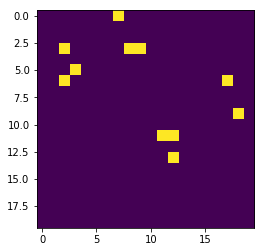

In [7]:
n_test=108
plt.imshow(train_set[n_test][0])
train_set[n_test][1]

In [35]:
tr_img_data = np.array([i[0] for i in train_set])
tr_lbl_data = np.array([i[1][0] for i in train_set])
tr_Temp_data = np.array([i[1][1] for i in train_set])
val_img_data = np.array([i[0] for i in valid_set])
val_lbl_data = np.array([i[1][0] for i in valid_set])
val_Temp_data = np.array([float(i[1][1]) for i in valid_set])

[0 1] 2.8


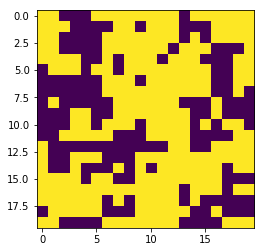

In [12]:
plt.imshow(tr_img_data[10])
print(tr_lbl_data[10],tr_Temp_data[10])

In [105]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(20, 20)),
    keras.layers.Dense(1000, activation=tf.nn.relu ),
   # keras.layers.Dense(1024, activation=tf.nn.relu ),
  #  keras.layers.Dense(1024, activation=tf.nn.relu ),
    keras.layers.Dense(2, activation=tf.nn.softmax)
    #keras.layers.Dense(2, activation=tf.nn.sigmoid)
])

In [106]:
model1.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [107]:
model1.fit(x=tr_img_data,y=tr_lbl_data, epochs=5,batch_size=64)

Epoch 1/5
4500/4500 [==============================] - 0s 85us/step - loss: 0.2472 - acc: 0.9071
Epoch 2/5
4500/4500 [==============================] - 0s 33us/step - loss: 0.1221 - acc: 0.9593
Epoch 3/5
4500/4500 [==============================] - 0s 34us/step - loss: 0.0880 - acc: 0.9680
Epoch 4/5
4500/4500 [==============================] - 0s 35us/step - loss: 0.0524 - acc: 0.9829
Epoch 5/5
4500/4500 [==============================] - 0s 34us/step - loss: 0.0403 - acc: 0.9873


In [108]:
val_loss, val_acc = model1.evaluate(val_img_data, val_lbl_data)
print('Test accuracy:', val_acc)

750/750 [==============================] - 0s 129us/step
Test accuracy: 0.9319999995231628


In [109]:
predictions=model1.predict(val_img_data)

In [110]:
low_predict = predictions[:,0]
high_predict = predictions[:,1]

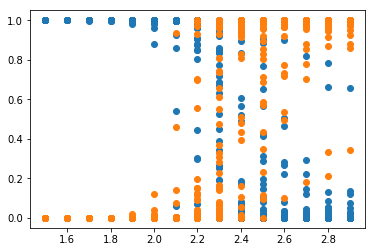

In [111]:
plt.plot(val_Temp_data,low_predict,'o')
plt.plot(val_Temp_data,high_predict,'o')

In [112]:
bad_predictions=[]
for i in range(len(val_lbl_data)):
    #if (low_predict[i]>0.5 and val_lbl_data[i]=='high' and val_Temp_data[i]>=2.6):
    if (low_predict[i]>0.5 and val_Temp_data[i]>=2.6):
        bad_predictions.append(i)

In [113]:
bad_predictions

[3, 123, 205, 223, 363, 713]

[0 1] 2.6 0.8983862


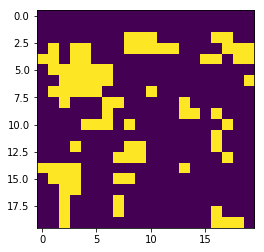

In [115]:
idx=3
plt.imshow(val_img_data[idx])
print(val_lbl_data[idx],val_Temp_data[idx],low_predict[idx])

In [116]:
import pandas as pd
df = pd.DataFrame({'pred_low':low_predict,'pred_high':high_predict, 'Temp':val_Temp_data})

In [117]:
df.sort_values(by='Temp')

,pred_low,pred_high,Temp
247,0.999946,0.000054,1.5
359,0.999956,0.000044,1.5
655,0.999851,0.000149,1.5
35,0.999982,0.000018,1.5
627,0.999957,0.000043,1.5
463,0.999960,0.000040,1.5
38,0.999900,0.000100,1.5
39,0.999972,0.000028,1.5
632,0.999925,0.000075,1.5
696,0.999932,0.000068,1.5


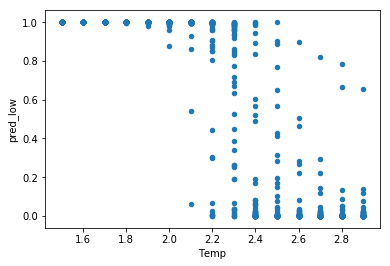

In [118]:
df.plot('Temp', 'pred_low', kind='scatter')

In [149]:
df2=df.groupby('Temp').mean()

In [136]:
df2=df2.reset_index()

In [137]:
df2

,Temp,pred_low,pred_high
0,1.5,0.999911,0.000089
1,1.6,0.999898,0.000102
2,1.7,0.999822,0.000178
3,1.8,0.999728,0.000272
4,1.9,0.999045,0.000955
5,2.0,0.995059,0.004941
6,2.1,0.966722,0.033278
7,2.2,0.800837,0.199163
8,2.3,0.627991,0.372008
9,2.4,0.195882,0.804118


In [150]:
df3=df.groupby('Temp').std()
#df3=df3.reset_index()

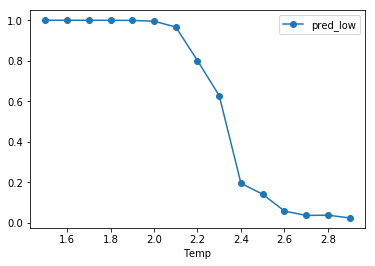

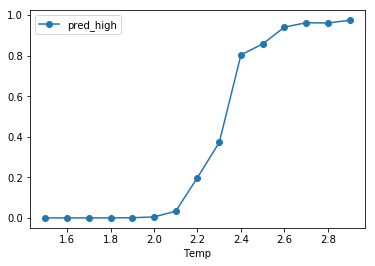

In [141]:
df2.plot(x='Temp',y='pred_low',marker='o')
df2.plot(x='Temp',y='pred_high',marker='o')

In [148]:
df3

,Temp,pred_low,pred_high
0,1.5,0.000092,0.000092
1,1.6,0.000084,0.000084
2,1.7,0.000255,0.000255
3,1.8,0.000365,0.000365
4,1.9,0.002514,0.002514
5,2.0,0.017925,0.017925
6,2.1,0.147175,0.147175
7,2.2,0.355757,0.355757
8,2.3,0.391703,0.391703
9,2.4,0.341555,0.341555


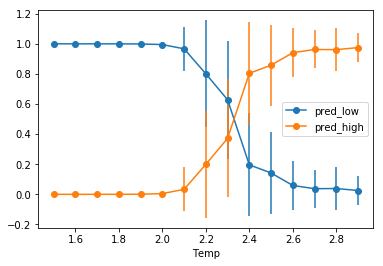

In [151]:
df2.plot(marker='o',yerr=df3)

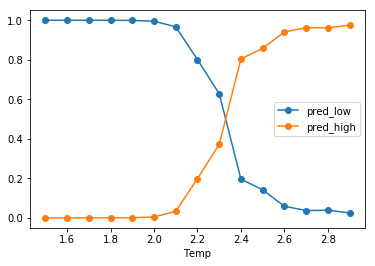

In [147]:
df2.plot(x='Temp',marker='o',yerr=df3)